# 영역 레이블링(Region Labeling)

영역(혹은, connected component)이란 각 픽셀들이 서로 다른 픽셀들과 연결되어 있는 픽셀들의 집합을 의미하는 것

영상을 스캔하여 픽셀 간의 연결성을 살펴보고 연결되어 있는 픽셀들을 같은 영역으로 그룹화 한 것을 말함

영역 레이블링 알고리즘은 픽셀들의 연결성을 체크하여 모든 연결된 영역을 찾고, 같은 영역에 해당하는 모든 픽셀에 각각 다른 레이블(고유한 번호) 값을 설정하는 방법

레이블맵, 바운딩 박스, 픽셀 개수, 무게 중심 좌표를 반환

In [9]:
import cv2
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import numpy as np
import cv2

(400, 600, 3)


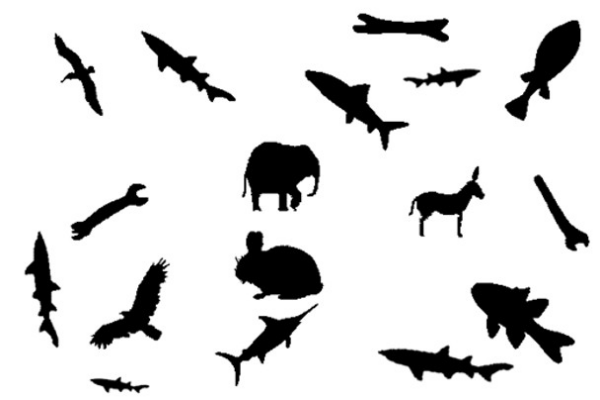

In [30]:
# 1. 이미지를 불러온다
img = cv2.imread('/content/gdrive/MyDrive/images/Target.bmp')
print(img.shape)
cv2_imshow(img)

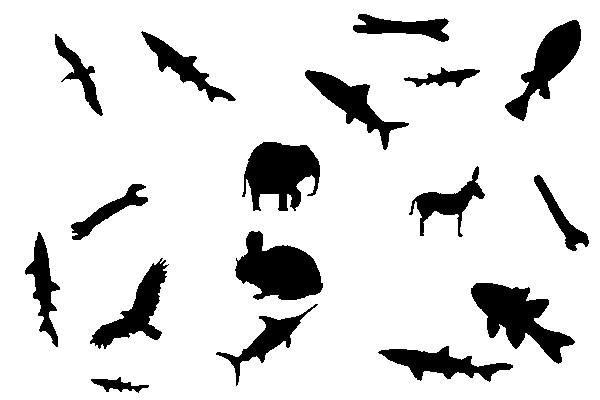

In [ ]:
# 2. 흰색과 검은색으로 이루어진 이미지를 이진화한다.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, test_binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 127보다 크면 255, 작으면 0
cv2_imshow(test_binary)

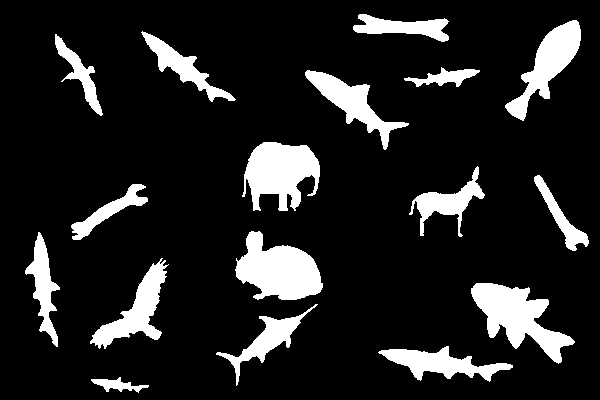

In [ ]:
# 3. 이미지의 색상을 반전(하얀색을 객체로 인식하기 때문)
test_binary = cv2.bitwise_not(test_binary)
cv2_imshow(test_binary)

In [ ]:
# 4. 레이블링 함수 사용하여 객체를 구분한다.
n, label = cv2.connectedComponents(test_binary) # 객체의 개수와 레이블링된 이미지를 반환
print(n) # 레이블 개수 출력
print(label[64]) # 64번의 레이블의 픽셀값 출력
print(label.shape) # 레이블의 형태 출력

18
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4
 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
for i in range(400):
    print(lable[i])

In [56]:
# 5. 레이블의 결과를 시각화
colors = [] # 시각화에 사용할 색상 리스트 초기화

for i in range(n):  # 각 레이블에 사용할 색상값을 `[0, 0, 0]`으로 설정 (기본은 검은색)
    colors.append(np.array([0, 0, 0]))

colors[0] = np.array([0, 0, 0]) # 배경 레이블(0번)에 검은색을 할당

# 각 객체에 무작위 RGB 색상을 할당 (배경 제외, 1번 레이블부터 시작)
for i in range(1, n):
    colors[i] = np.random.randint(0, 256, 3)

# 색상 리스트를 NumPy 배열로 변환 (타입은 `uint8`)
colors = np.array(colors, dtype=np.uint8)

# 레이블 맵을 색상으로 치환해 시각화된 결과 이미지 생성
result = colors[label]


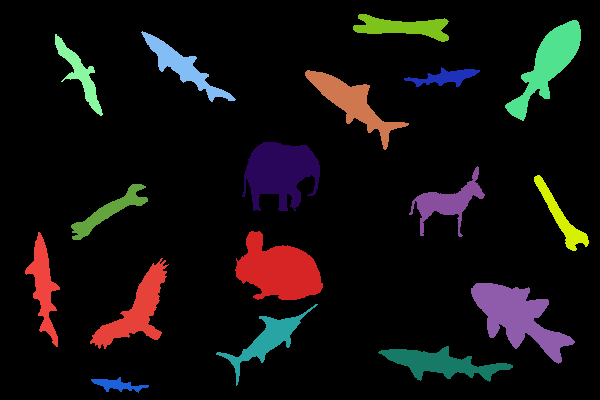

In [57]:
# 6. 결과 이미지를 출력
cv2_imshow(result)

In [64]:
# 객체 정보를 함께 반환하는 레이블링 함수 사용
n, labels, stats, centroids = cv2.connectedComponentsWithStats(test_binary)

In [65]:
# 4. 레이블링 정보
print('n = ', n) # 연결된 영역의 개수 (배경 포함)
print('labels = ', labels) # 각 픽셀에 대해 레이블 값을 갖는 2차원 배열
print('stats = ', stats) # 각 레이블링 영역의 바운딩 박스 정보
print('centroids = ', centroids) # 각 레이블링 영역의 무게 중심 좌표

n =  18
labels =  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
stats =  [[     0      0    600    400 207653]
 [   353     14     96     28   1370]
 [   505     20     76    101   2708]
 [   141     31     95     71   1579]
 [    55     34     48     82   1036]
 [   404     67     76     20    658]
 [   305     70    104     80   2250]
 [   242    142     78     69   3558]
 [   409    166     76     71   1592]
 [   534    175     55     76    986]
 [    71    184     77     56   1128]
 [   235    231     88     69   3824]
 [    25    232     35    115   1525]
 [    90    258     79     91   2362]
 [   471    283    104     81   3700]
 [   216    304    102     82   1604]
 [   378    346    135     36   2069]
 [    91    377     58     16    398]]
centroids =  [[294.987874   197.43170578]
 [402.5270073   26.82481752]
 [547.55649926  64.28581979]
 [182.65231159  66.6681444 ]
 [ 79.42471042  73.74227799]
 [445.1185

In [80]:
# 5. 레이블링 정보를 이용하여 바운딩 박스와 중심점을 시각화
for i in range(1, n): # 배경 레이블(0번) 제외
    x, y, width, height, area = stats[i] # 바운딩 박스 정보
    cx, cy = centroids[i] # 중심점 좌표

    # 바운딩 박스 표시
    cv2.rectangle(result, (x, y), (x+width, y+height), (0, 255, 0), 1)

    # 중심점 표시 & 숫자 부여
    cv2.putText(result, str(i), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 2, 255), 2, cv2.LINE_AA)
    cv2.circle(result, (int(cx), int(cy)), 3, (222, 2, 255), -1)

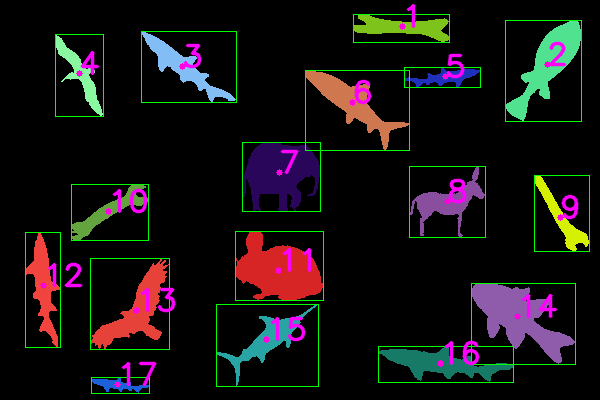

In [81]:
cv2_imshow(result)